<h2>Assignment 1 - Part 1: Linear Regression on Boston Housing Data</h2>

You're asked to do the following tasks to predict boston house price:
<lu>
<li>Use scikit-learn</li>
<li>Implement analytical solution (normal equation) to obtain weights</li>
<li>Implement numerical solution (gradient descent) to obtain weights</li>
</lu>
    Note: the accuracy of your implementations should be close to that of a linear model from scikit-learn

In addition, you need to show the resulting intercept and coefficents, calculate errors on training dataset and testing dataset, and plot a figure to show your predictions and real prices on the testing dataset. 

In [1]:
################################################ Import libraries ############################################################
# The modules we're going to use
from __future__ import print_function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import sklearn 
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
# When you execute a code to plot with a simple SHIFT-ENTER, the plot will be shown directly under the code cell
%matplotlib inline

In [2]:
####################### Loading dataset and splitting into test and training datasets #########################################
# Load data from scikit-learn, which returns (data, target)
# note: if you call "boston = load_boston()", it returns a dictionary-like object
data, target = datasets.load_boston(True)

# Split the data into two parts: training data and testing data 
# Here testing dataset size=20% and training dataset=80%
train_data,test_data,train_target,test_target = train_test_split(data,(target[:, np.newaxis]), test_size=0.2, random_state=42)

<h4>Use scikit-learn library in the following cell</h4>

Intercept: [30.28894834]
Coefficients: [[-1.12463481e-01  3.00810168e-02  4.07309919e-02  2.78676719e+00
  -1.72406347e+01  4.43248784e+00 -6.23998173e-03 -1.44848504e+00
   2.62113793e-01 -1.06390978e-02 -9.16398679e-01  1.24516469e-02
  -5.09349120e-01]]
Error of training data: 10.820787048327794
Error of testing data: 12.155713464846757


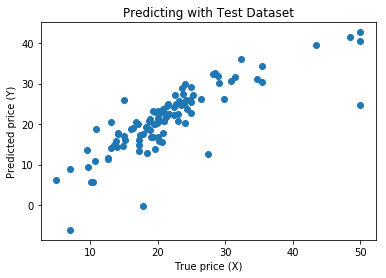

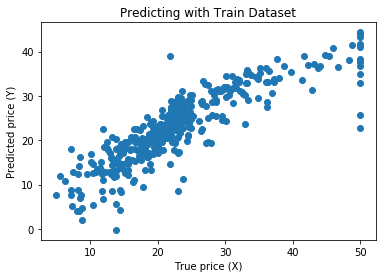

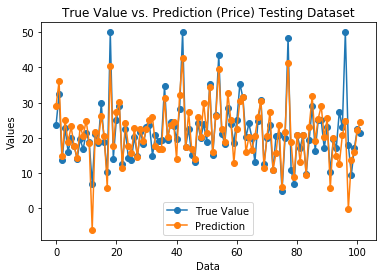

In [3]:
############################### Task 1-1: use linear regression in sklearn #####################################################
regressor = LinearRegression()  #creating linear regression object
model=regressor.fit(train_data, train_target) # building model using training dataset

predicted = model.predict(test_data) #model prediction on testing dataset
predicted_train = model.predict(train_data) #model prediction on training dataset

############################## Task 1-2: show intercept and coefficents ########################################################
# using attribute 'intercept' and 'coef_' of linearRegression module of sklearn
# View the intercept
print('Intercept:',model.intercept_) 
# View the feature coefficients
print('Coefficients:', model.coef_)

############################## Task 1-3: show errors on training dataset and testing dataset ###################################
# using mean squared error formula given in class to show errors on testing and training dataset 
# (Summation of [(ti - yi)^2])/2N, N=number of features
# using numpy.mean function to get the mean and dividing by 2
print('Error of training data:',np.mean((predicted_train - train_target) **2)/2)  
print('Error of testing data:',np.mean((predicted - test_target) **2)/2)  


################ Task 1-4: show plot a figure to show your predictions and real prices on the testing dataset ##################
#plotting predicted price values with price values of with testing dataset
plt.figure()
plt.scatter(test_target, predicted)
plt.axis('tight')
plt.xlabel('True price (X)')
plt.ylabel('Predicted price (Y)')
plt.title('Predicting with Test Dataset')


#plotting predicted price values with price values of training dataset
plt.figure()
plt.scatter(train_target, predicted_train)
plt.axis('tight')
plt.xlabel('True price (X)')
plt.ylabel('Predicted price (Y)')
plt.title('Predicting with Train Dataset')


#graph for comparing true and predicted values on testing dataset
predValues = predicted.ravel().tolist()
trueValues = test_target.ravel().tolist()
plt.figure()
plt.plot(trueValues, '-o', predValues, '-o')# ploting true and predicted values
plt.title('True Value vs. Prediction (Price) Testing Dataset') #title of graph
plt.xlabel('Data')
plt.ylabel('Values')
plt.legend(['True Value', 'Prediction']) #indication labels


<h4>Use analytical solution (normal equation) to perform linear regression in the following cell</h4>

Intercept:  [30.28894834]
Coefficients:  [[-1.12463481e-01]
 [ 3.00810168e-02]
 [ 4.07309919e-02]
 [ 2.78676719e+00]
 [-1.72406347e+01]
 [ 4.43248784e+00]
 [-6.23998173e-03]
 [-1.44848504e+00]
 [ 2.62113793e-01]
 [-1.06390978e-02]
 [-9.16398679e-01]
 [ 1.24516469e-02]
 [-5.09349120e-01]]
Error of training data: 10.820787048327793
Error of testing data: 12.155713464846741


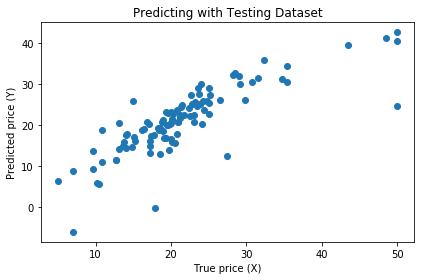

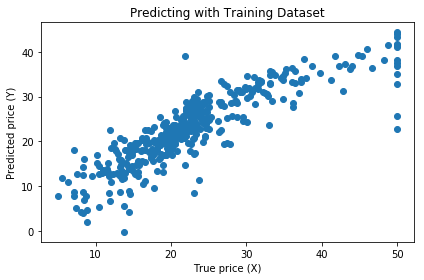

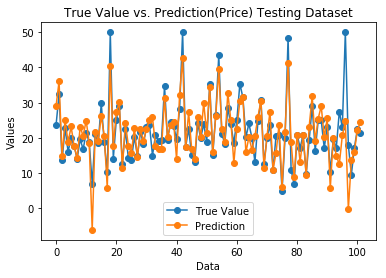

In [4]:
################################# Task 2-1: Implement a function solving normal equation ######################################
# Inputs: Training data and  training label
# Output: Weights
def myNormalEqualFun(X,y):
    #using normal eqution formula: w= [inverse of (XT* X)] * (XT * t), where XT=transpose of X and t=y(i.e. target)
    XtX_Xt = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()) #calculating inverse of (XT * X)
    w = XtX_Xt.dot(y) #getting the final value by multiplying with target i.e. y
    return w
    
####################################### Task 2-2: Implement a function performing prediction ###################################
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    return X.dot(w) #multiplication of X by weights w to get predictions

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myNormalEqual to train the model and get weights
w = myNormalEqualFun(train_data_intercept,train_target)

prediction_test = myPredictFun(test_data_intercept, w) # model predictions for testing dataset
prediction_train = myPredictFun(train_data_intercept, w) # model predictions for training dataset

######################################## Task 2-3: show intercept and coefficents #############################################
#Printing generaated intercepts and coefficients
print ('Intercept: ', w[0]) 
print ('Coefficients: ', w[1:])

############################## Task 2-4: show errors on training dataset and testing dataset ###################################
# using mean squared error formula given in class to show errors on testing and training dataset 
# (Summation of [(ti - yi)^2])/2N, N=number of features
# using numpy.mean function to get the mean and dividing by 2
print ('Error of training data:', np.mean((train_target - prediction_train) ** 2)/2)
print ('Error of testing data:', np.mean((test_target - prediction_test) ** 2)/2)

################# Task 2-5: show plot a figure to show your predictions and real prices on the testing dataset #################
#plotting predicted price values with price values of with testing dataset
plt.figure()
plt.scatter(test_target, prediction_test)
plt.axis('tight')
plt.xlabel('True price (X)')
plt.ylabel('Predicted price (Y)')
plt.title('Predicting with Testing Dataset')
plt.tight_layout()

#plotting predicted price values with price values of with testing dataset
plt.figure()
plt.scatter(train_target, prediction_train)
plt.axis('tight')
plt.xlabel('True price (X)')
plt.ylabel('Predicted price (Y)')
plt.title('Predicting with Training Dataset')
plt.tight_layout()

#graph for comparing true values and predicted values on Testing dataset
predValues = prediction_test.ravel().tolist()
trueValues = test_target.ravel().tolist()
plt.figure()
plt.plot(trueValues, '-o', predValues, '-o') #plotting true and predicted values
plt.title('True Value vs. Prediction(Price) Testing Dataset') #title of graph
plt.xlabel('Data')
plt.ylabel('Values')
plt.legend(['True Value', 'Prediction'])#indication labels


<h4>Use numerical solution (gradient descent) to perform linear regression in the following cell</h4>

Intercept:  [22.79653465]
Coefficients:  [[-0.99623159]
 [ 0.69558672]
 [ 0.28047498]
 [ 0.71933987]
 [-2.02678658]
 [ 3.14074244]
 [-0.17447164]
 [-3.08322639]
 [ 2.24869056]
 [-1.76573149]
 [-2.03984916]
 [ 1.13874214]
 [-3.617181  ]]
Error of Training dataset: 10.820787048330194
Error of Testing dataset: 12.155715063243386


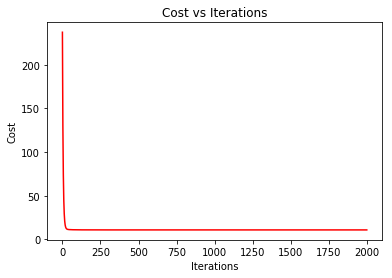

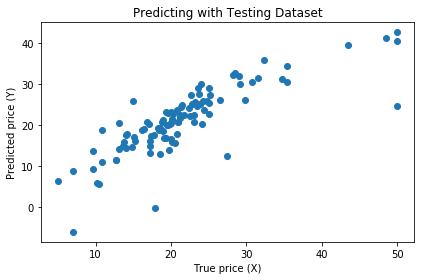

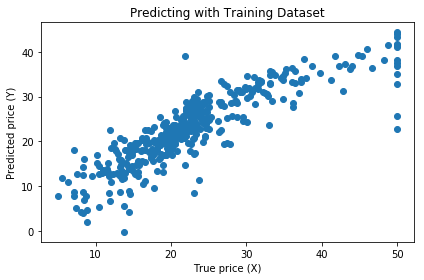

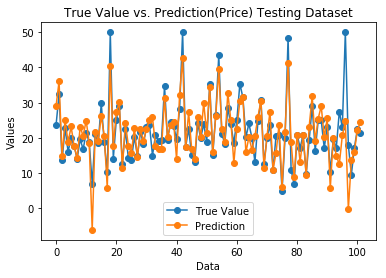

In [5]:
########################## Task 3-1: Implement a function performing gradient descent ##########################################
# Inputs: Training data, training label, leaerning rate, number of iterations
# Output: Weights
def myGradientDescentFun(X,y,learning_rate,numItrs):
    w = np.zeros((1,X.shape[1])) #initializing w with zeros with columns = number of features
    cost = np.zeros(numItrs) #initializing cost array with zeros to collect all the cost function values at each iterations
    for i in range(numItrs):
        #using gradient descent formula to update w, w= w + e * 1/N * [XT (t-Xw)], 
        #where XT=transpose of X, t= y i.e target, N=number of features
        w = w - (learning_rate/len(X)) * np.sum(X * (X @ w.T - y), axis=0)
        cost[i] = computeCost(X, y, w) #compute the cost function and store all values in an array
        
    w=w.transpose()
    return w,cost
    
#computecost
def computeCost(X,y,w):
    # using formula of cost function= 1/2N * ((summation of [t-Xw])^2), where N= number of features
    tobesummed = np.power(((X @ w.T)-y),2) 
    return np.sum(tobesummed)/(2 * len(X))

################################# Task 3-2: Implement a function performing prediction #########################################
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    return X.dot(w) #multiplication of X by weights w to get predictions

# Feature scaling
#StandardScaler is used to scale the data that is normally distributed within each feature with a standard deviation of 1.
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myGradientDescentFun to train the model and get weights
# Note: you need to figure out good learning rate value and the number of iterations
w, cost = myGradientDescentFun(train_data_intercept,train_target,0.1,2000)

prediction_test_g = myPredictFun(test_data_intercept, w) #getting predictions for test dataset
prediction_train_g = myPredictFun(train_data_intercept, w) #getting predictions for train dataset

######################################## Task 3-3: show intercept and coefficents ##############################################
#Printing generaated intercepts and coefficients
print ('Intercept: ', w[0])
print ('Coefficients: ', w[1:])

############################## Task 3-4: show errors on training dataset and testing dataset ###################################
# using mean squared error formula given in class to show errors on testing and training dataset 
# (Summation of [(ti - yi)^2])/2N, N=number of features
# using numpy.mean function to get the mean and dividing by 2
print ('Error of Training dataset:', np.mean((train_target - prediction_train_g) ** 2)/2)
print ('Error of Testing dataset:', np.mean((test_target - prediction_test_g) ** 2)/2)

################ Task 3-5: show plot a figure to show your predictions and real prices on the testing dataset ##################
#plotting cost at each iterations
fig, ax = plt.subplots()  
ax.plot(np.arange(2000), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Cost vs Iterations')  

#plotting predicted price values with price values of with testing dataset
plt.figure()
plt.scatter(test_target, prediction_test_g)
plt.axis('tight')
plt.xlabel('True price (X)')
plt.ylabel('Predicted price (Y)')
plt.title('Predicting with Testing Dataset')
plt.tight_layout()

#plotting predicted price values with price values of with testing dataset
plt.figure()
plt.scatter(train_target, prediction_train_g)
plt.axis('tight')
plt.xlabel('True price (X)')
plt.ylabel('Predicted price (Y)')
plt.title('Predicting with Training Dataset')
plt.tight_layout()

#graph for comparing true values and predicted values on Testing dataset
predValues = prediction_test_g.ravel().tolist()
trueValues = test_target.ravel().tolist()
plt.figure()
plt.plot(trueValues, '-o', predValues, '-o') #plotting true values and predicted values
plt.title('True Value vs. Prediction(Price) Testing Dataset') # title of graph
plt.xlabel('Data')
plt.ylabel('Values')
plt.legend(['True Value', 'Prediction'])#indication labels